In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Daten einlesen

Die Zeilen 'datetime' und 'date posted' sollen als datum interpretiert werden.
Zusätzlich soll die index spalte ignoriert werden.

In [3]:
df = pd.read_csv('ufo-sightings/scrubbed.csv', 
                 parse_dates=['datetime','date posted'], 
                 index_col=0)
df = df.rename(columns={'longitude ': 'longitude'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80119 entries, 0 to 80331
Data columns (total 11 columns):
datetime                32395 non-null datetime64[ns]
city                    80119 non-null object
state                   74335 non-null object
country                 70475 non-null object
shape                   78193 non-null object
duration (seconds)      80119 non-null int64
duration (hours/min)    80119 non-null object
comments                80104 non-null object
date posted             80119 non-null datetime64[ns]
latitude                80119 non-null float64
longitude               80119 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 7.3+ MB


Schau dir nun die ersten 5 Einträge an

In [5]:
df.head(5)

datetime                  city state country     shape  \
0 1949-10-10 20:30:00            san marcos    tx      us  cylinder   
1 1949-10-10 21:00:00          lackland afb    tx     NaN     light   
2 1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3 1956-10-10 21:00:00                  edna    tx      us    circle   
4 1960-10-10 20:00:00               kaneohe    hi      us     light   

   duration (seconds) duration (hours/min)  \
0                2700           45 minutes   
1                7200              1-2 hrs   
2                  20           20 seconds   
3                  20             1/2 hour   
4                 900           15 minutes   

                                            comments date posted   latitude  \
0  This event took place in early fall around 194...  2004-04-27  29.883056   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  2005-12-16  29.384210   
2  Green/Orange circular disc over Chester&#44 En...  2008-01-21  53.200000   
3  My older brother and twin sister were leaving ...  2004-01-17  28.978333   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...  2004-01-22  21.418056   

    longitude  
0  -97.941111  
1  -98.581082  
2   -2.916667  
3  -96.645833  
4 -157.803611

Das datenformat ist noch nicht optimal. Duration (hours/min) ist unbrauchbar, weil es ganz verschiedene formate sind. Wir solten diese spalte entfernen und duration(seconds) in duration umbenennen.

In [6]:
df = df.drop(['duration (hours/min)'], axis=1, errors='ignore')
df = df.rename(columns={'duration (seconds)':'duration'})
df

datetime                  city state country     shape  \
0     1949-10-10 20:30:00            san marcos    tx      us  cylinder   
1     1949-10-10 21:00:00          lackland afb    tx     NaN     light   
2     1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3     1956-10-10 21:00:00                  edna    tx      us    circle   
4     1960-10-10 20:00:00               kaneohe    hi      us     light   
...                   ...                   ...   ...     ...       ...   
80327 2013-09-09 21:15:00             nashville    tn      us     light   
80328 2013-09-09 22:00:00                 boise    id      us    circle   
80329 2013-09-09 22:00:00                  napa    ca      us     other   
80330 2013-09-09 22:20:00                vienna    va      us    circle   
80331 2013-09-09 23:00:00                edmond    ok      us     cigar   

       duration                                           comments  \
0          2700  This event took place in early fall around 194...   
1          7200  1949 Lackland AFB&#44 TX.  Lights racing acros...   
2            20  Green/Orange circular disc over Chester&#44 En...   
3            20  My older brother and twin sister were leaving ...   
4           900  AS a Marine 1st Lt. flying an FJ4B fighter/att...   
...         ...                                                ...   
80327       600  Round from the distance/slowly changing colors...   
80328      1200  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   
80329      1200                                       Napa UFO&#44   
80330         5  Saw a five gold lit cicular craft moving fastl...   
80331      1020  2 witnesses 2  miles apart&#44 Red &amp; White...   

      date posted   latitude   longitude  
0      2004-04-27  29.883056  -97.941111  
1      2005-12-16  29.384210  -98.581082  
2      2008-01-21  53.200000   -2.916667  
3      2004-01-17  28.978333  -96.645833  
4      2004-01-22  21.418056 -157.803611  
...           ...        ...         ...  
80327  2013-09-30  36.165833  -86.784444  
80328  2013-09-30  43.613611 -116.202500  
80329  2013-09-30  38.297222 -122.284444  
80330  2013-09-30  38.901111  -77.265556  
80331  2013-09-30  35.652778  -97.477778  

[80119 rows x 10 columns]

Wir lernen nun die function groupby kennen.
Sie gruppiert einträge anhand eines spaltenwertes.
Mit der funktion size können wir nun die grösse jeder Gruppe bestimmen

In [7]:
shape_groups = df.groupby(['shape']).size()

In [9]:
shape_groups

shape
changed          1
changing      1961
chevron        949
cigar         2055
circle        7586
cone           316
crescent         2
cross          233
cylinder      1282
delta            7
diamond       1176
disk          5202
dome             1
egg            756
fireball      6180
flare            1
flash         1315
formation     2454
hexagon          1
light        16523
other         5622
oval          3730
pyramid          1
rectangle     1294
round            2
sphere        5370
teardrop       747
triangle      7855
unknown       5571
dtype: int64

Wie kann man damit jetzt ein Tortendiagramm erstellen?

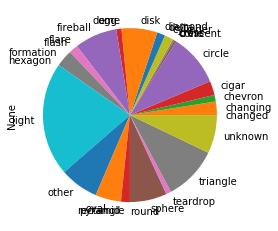

In [10]:
shape_groups.plot.pie()

Lasst uns das noch ein bisschen Aufhübschen:

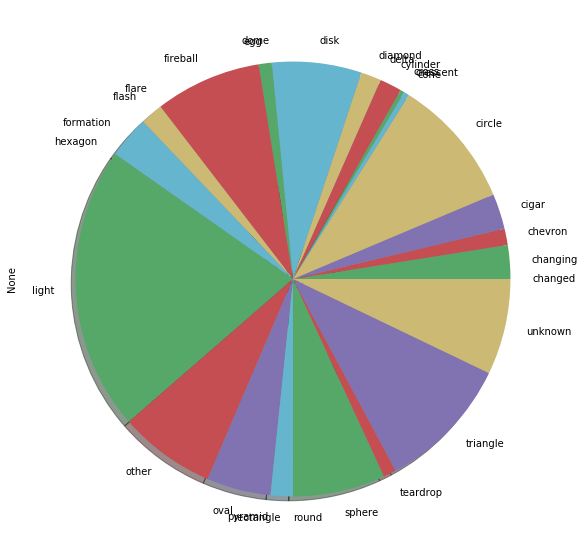

In [11]:
plt.style.use('seaborn-deep') # sucht euch einen style aus https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
shape_groups.plot.pie(figsize=(20,10), shadow=True)

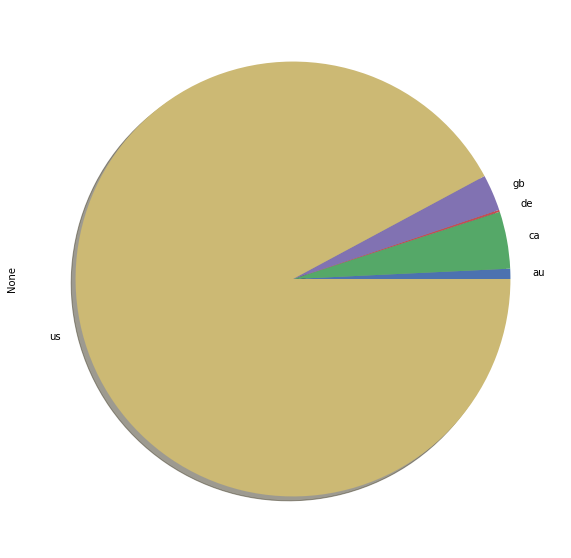

In [33]:
country_groups = df.groupby('country').size()
country_groups.plot.pie(figsize=(20,10), shadow=True)

Wie lange waren Ufosichtungen üblicherweise?

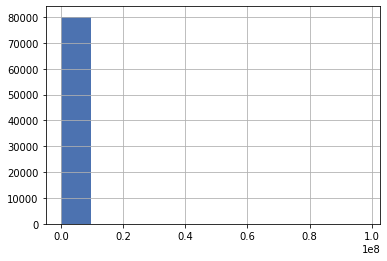

In [35]:
df.duration.hist(bins=10)

hmm das sieht komisch aus. Das diagramm geht bis $10^8$, also haben wir wahscheinlich ein paar ausreisser.

In [36]:
max_seconds = 60 * 60 * 2 # 1 stunden in sekunden
len(df[df.duration > max_seconds])

1549

Im Vergleich zu den 80000 datenpunkten die wir vorliegen haben, sind die 1 stunden sichtungen nur ein kleiner teil.

In [14]:
len(df[df.duration > max_seconds]) / len(df)

0.019333741060172993

Gibt es viele einträge mit 0?

In [15]:
len(df[df.duration == 0])

20

Einträge mit 0 sind nicht das problem. Viele Sichtungen sind also einfach nur sehr kurz.


Aufgabe: Was sind die minimal und maximalen werte?

In [16]:
df.duration.min(), df.duration.max()

(0, 97836000)

Alles klar, unser einziges Problem sind also die ausreisser über einer Stunde.
Wir filtern also alles über einer Stunde raus, so kriegen wir

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117d81410>]],
      dtype=object)

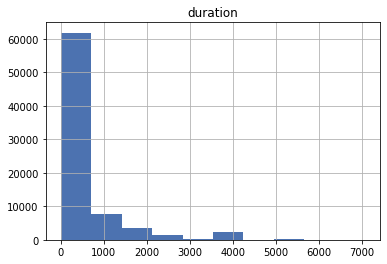

In [17]:
df[df.duration < max_seconds].hist(column='duration')

Wie sind jetzt die Sichtungen geografisch verteilt? Dafür müssen wir ein paar packages installieren

In [18]:
#%conda install geopandas
#%pip install descartes

In [19]:
import geopandas
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
# Kartendaten laden
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

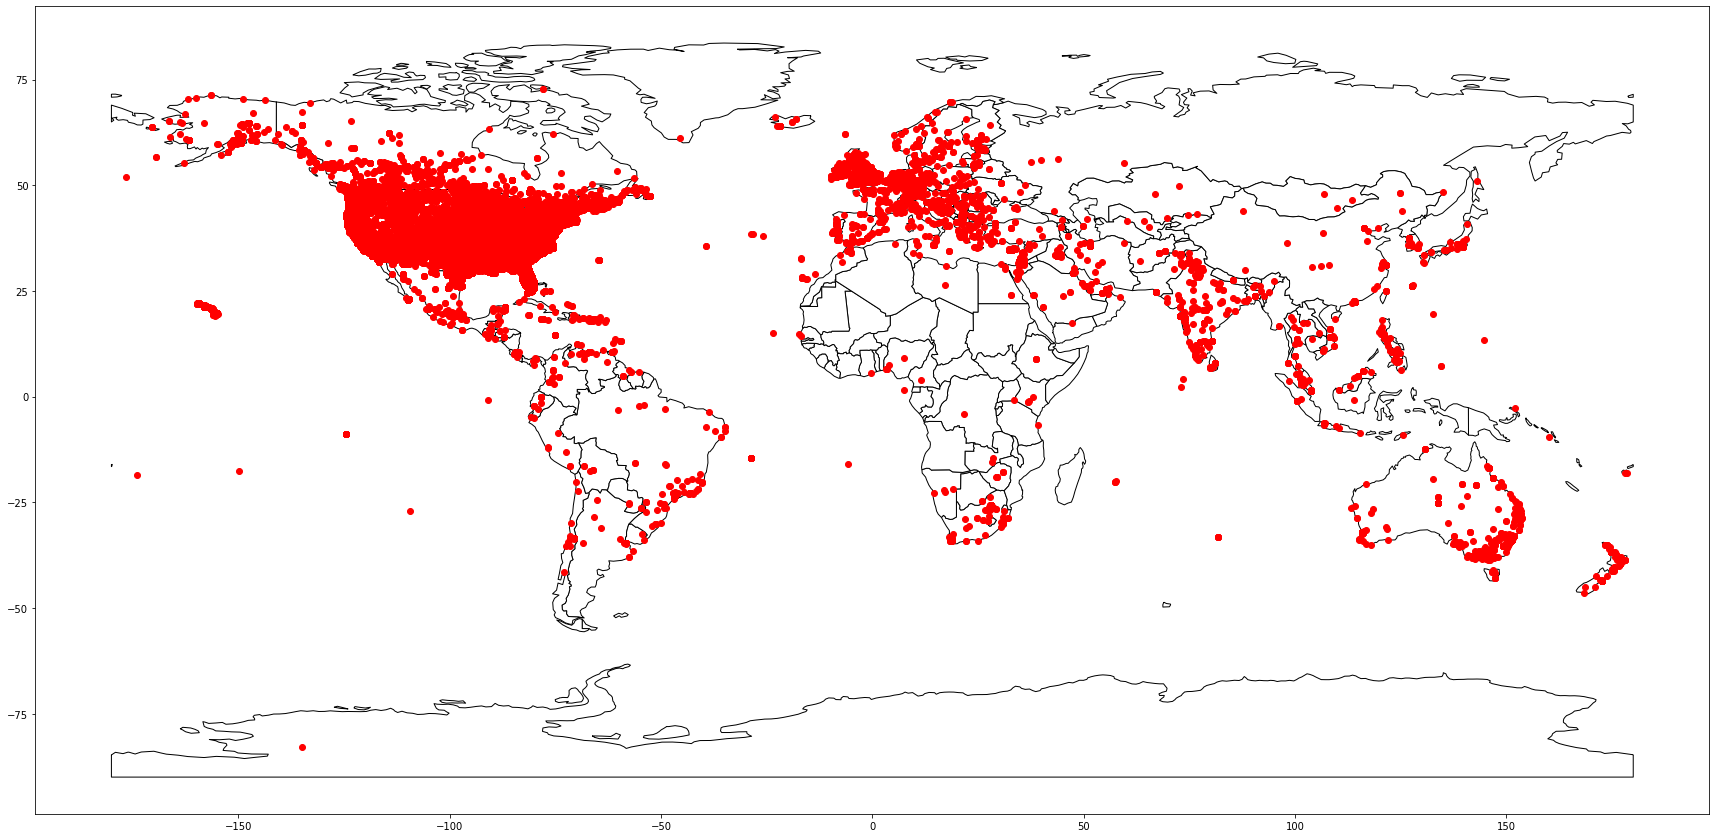

In [20]:
# Kartendaten filtern und dann plotten
ax = world.plot(
    color='white', edgecolor='black', figsize=(30, 30))

gdf.plot(ax=ax, color='red')

country
au      535
ca     2993
de      105
gb     1902
us    64940
dtype: int64

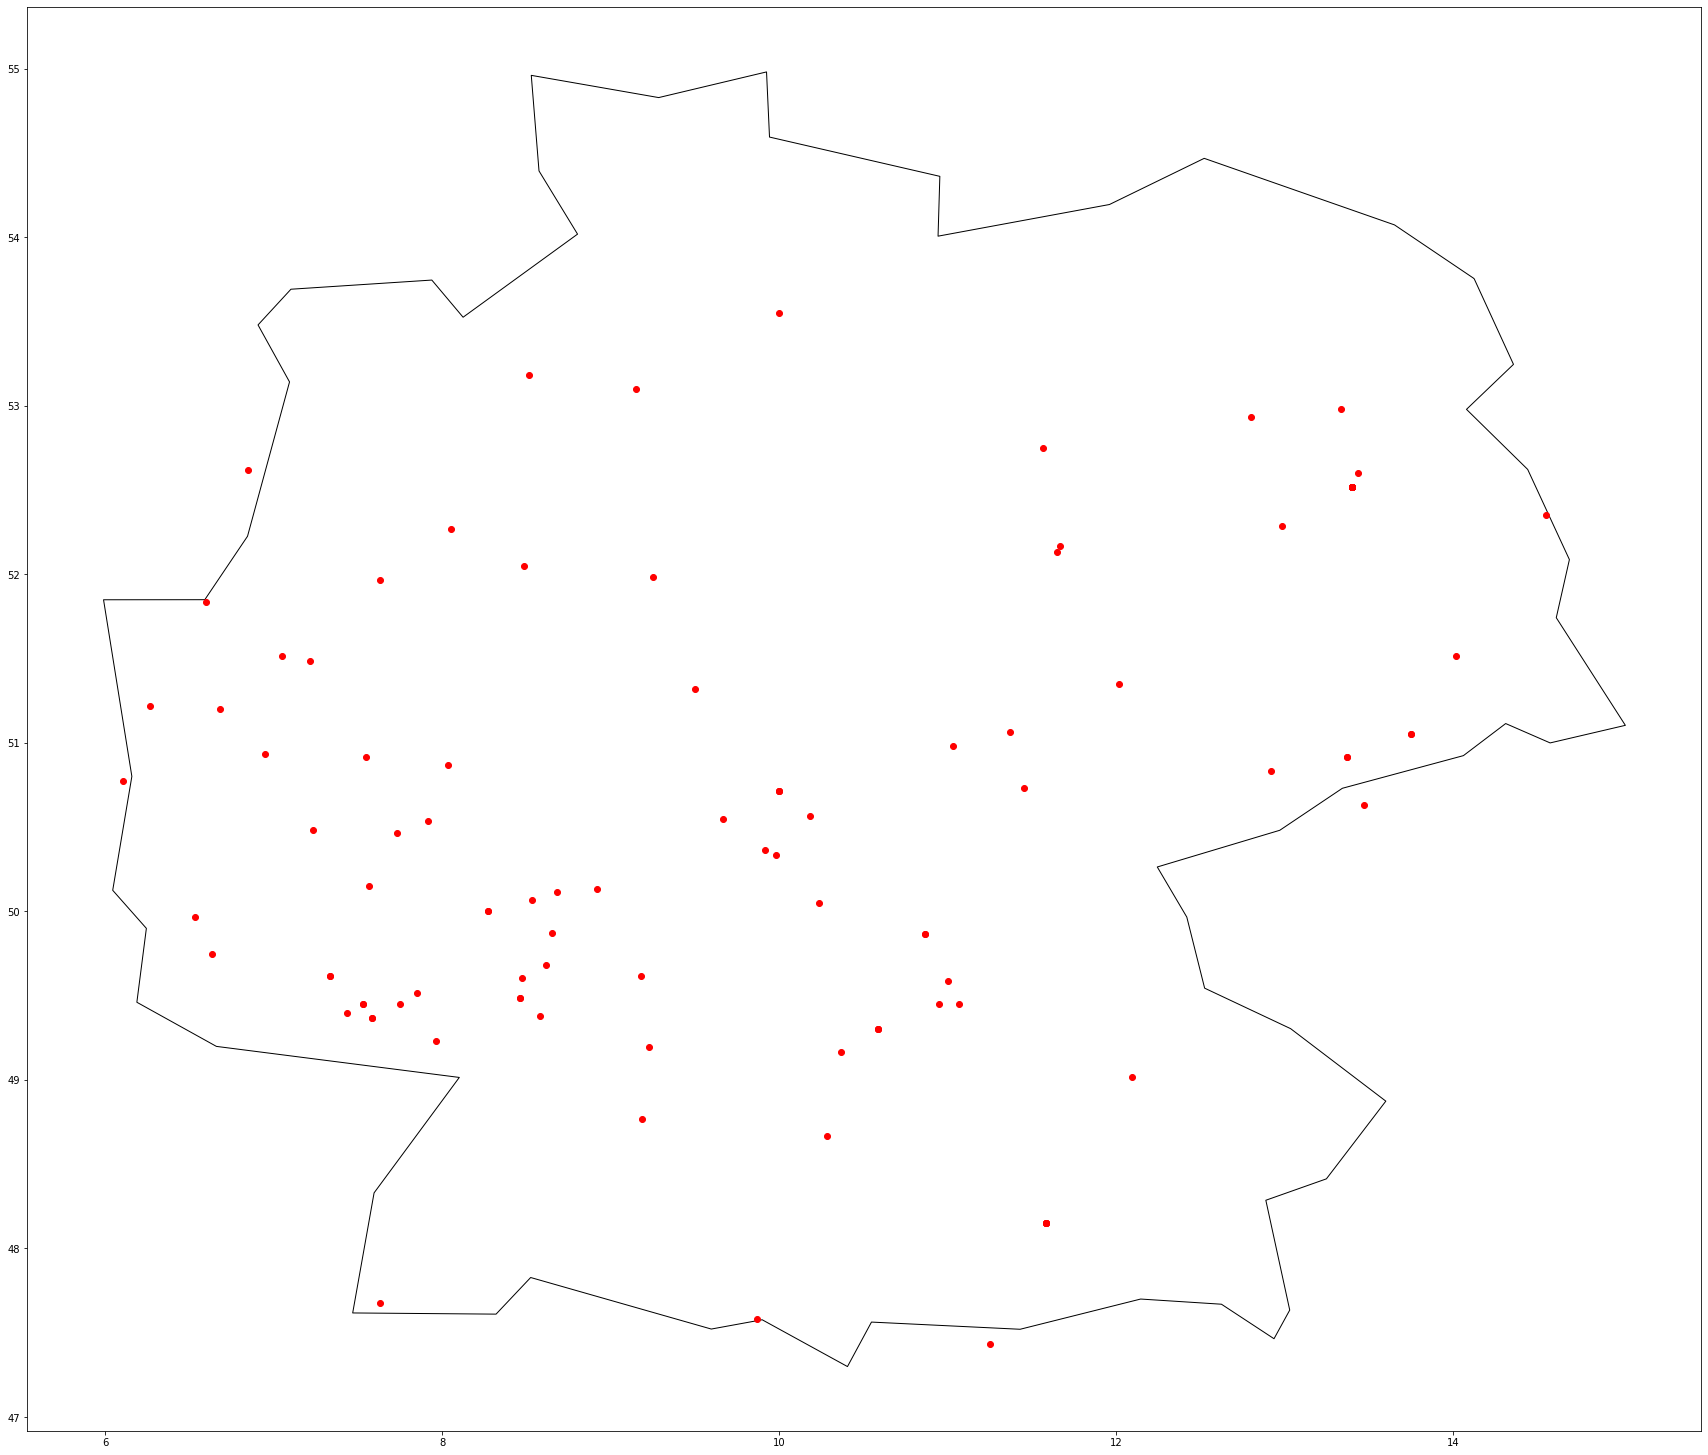

In [31]:
# Kartendaten filtern und dann plotten
ax = world[world.name == "Germany"].plot(
    color='white', edgecolor='black', figsize=(30, 30))
df_germany = df[df.country=='de']

gdf_germany = geopandas.GeoDataFrame(
    df_germany, geometry=geopandas.points_from_xy(df_germany.longitude, df_germany.latitude))
gdf_germany.plot(ax=ax, color='red')